In [1]:
#Librerias
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt 

pd.options.display.max_columns = None

In [118]:
#FUNCIONES UTILES
#......................................................................................................
#Funcion imprimir dos tables juntos en la misma celda:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
#......................................................................................................
#Aplicar get_dummies a todas las columnas de un data que sean "object"
def dummy_data(df):
    for columna in df.select_dtypes(include=['object']).columns:
        df[columna]  = pd.Categorical(df[columna])
        df_transformed = pd.get_dummies(df,drop_first=True)
        return df_transformed
    

In [136]:
#Base de datos 
df = pd.read_csv("D:/DATASET/youngpeople.csv")
df.iloc[:,:5].head(5)                         #Mostrar primeras 5 filas y columnas

,Music,Slow songs or fast songs,Dance,Folk,Country
0,5.0,3.0,2.0,1.0,2.0
1,4.0,4.0,2.0,1.0,1.0
2,5.0,5.0,2.0,2.0,3.0
3,5.0,3.0,2.0,1.0,1.0
4,5.0,3.0,4.0,3.0,2.0


In [49]:
#PLANTILLA: Variables categóricas y valores nulos
print('\033[1m'+"Dimensiones de la base de datos: "+ str(df.shape))
print()
#Variables categóricas (object)
#Ver que tipos de variables hay en el data
print('\033[1m'+"Tipos de variables en el data:")
display(df.dtypes.value_counts()) 


#Ver el numero de niveles de las variables "object"
print('\033[1m'+"Numero de niveles de las variables object: " )
display(df.loc[:, df.dtypes == object].nunique().head(15))


#Mostrar las columnas que son "object" y su numero de niveles 
print ('\033[1m'+"Columnas del data que son -object- y su numero de niveles: ")
display(df.loc[:, df.dtypes == object].apply(lambda x: pd.Series(pd.unique(x))).fillna('').head(10))

#Porcentaje de valores nulos de todo el data:
print('\033[1m'+"Porcentaje de NA en todo el data:" +str((df.isna().sum().sum())/(len(df)*len(df.columns)*100))+" %")

#Porcentaje de valores nulos por columna (Top)
from IPython.display import display, HTML
df_NA_C = df.isnull().sum(axis = 0)*100/ len(df)
df_NA_C = pd.DataFrame(round(df_NA_C.sort_values(ascending=False).head(10),2))
df_NA_C.columns=["Columna_NA_%"]

#Porcentaje de valores nulos por fila (Top)
df_NA_F = df.isnull().sum(axis = 1)*100/ len(df.columns)
df_NA_F = pd.DataFrame(round(df_NA_F.sort_values(ascending=False).head(10),2))
df_NA_F.columns=["Fila_NA_%"]
print(" ")
print('\033[1m'+"Porcentaje de valores nulos por columna y fila (Top): ")
display_side_by_side(df_NA_C,df_NA_F)

Dimensiones de la base de datos: (1010, 150)

Tipos de variables en el data:


float64    134
object      11
int64        5
dtype: int64

Numero de niveles de las variables object: 


Smoking                   4
Alcohol                   3
Punctuality               3
Lying                     4
Internet usage            4
Gender                    2
Left - right handed       2
Education                 6
Only child                2
Village - town            2
House - block of flats    2
dtype: int64

Columnas del data que son -object- y su numero de niveles: 


,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,never smoked,drink a lot,i am always on time,never,few hours a day,female,right handed,college/bachelor degree,no,village,block of flats
1,tried smoking,social drinker,i am often early,sometimes,most of the day,male,left handed,secondary school,yes,city,house/bungalow
2,former smoker,never,i am often running late,only to avoid hurting someone,less than an hour a day,,,primary school,,,
3,current smoker,,,everytime it suits me,no time at all,,,masters degree,,,
4,,,,,,,,doctorate degree,,,
5,,,,,,,,currently a primary school pupil,,,
6,,,,,,,,,,,


Porcentaje de NA en todo el data:4.013201320132013e-05 %
 
Porcentaje de valores nulos por columna y fila (Top): 


,Columna_NA_%
Weight,1.98
Height,1.98
Passive sport,1.49
Chemistry,0.99
Geography,0.89
Documentary,0.79
Latino,0.79
Smoking,0.79
Punk,0.79
Theatre,0.79


# Machine Learning: Clasificación

In [381]:
#PLANTILLA: Pre procesado de datos

#Seleccionar variables.....................................................................................................
df = pd.read_csv("D:/DATASET/youngpeople.csv")
Tarjet = "Happiness in life"

df.dropna(subset=[Tarjet], inplace=True)
X = df.drop(Tarjet,axis=1)
Y = df[Tarjet]


#Aplicar get_dummies a todas las columnas de un data que sean "object"....................................................
X = dummy_data(df.drop(Tarjet,axis=1))
X_columns = X.columns

#Dividir en test/train.....................................................................................................
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


#Rellenar valores nulos con media de columna................................................................................ 
X_test.fillna(X_test.mean(), inplace=True)
X_train.fillna(X_train.mean(), inplace=True)

# Escalado de variables.....................................................................................................
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Anaconda3\envs\Aibloy\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Predicción : 0.54 (+/- 0.05)

Matriz de confusion: 


,4.0,2.0,3.0,5.0,1.0
4.0,0,0,3,0,0
2.0,0,0,5,7,0
3.0,0,0,22,71,1
5.0,0,0,11,145,0
1.0,0,0,1,34,2


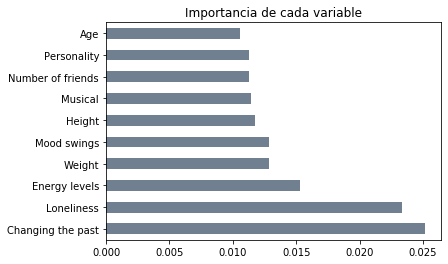

In [372]:
# Arbol de decisión: Clasificación 
from sklearn.ensemble import RandomForestClassifier
#.......................................................................
random_forest = RandomForestClassifier(
    n_estimators=100                    #n_estimators = Numero de arboles que componen el bosque. Por defecto 10.
)
#.......................................................................
random_forest.fit(X_train, Y_train)

Y_pred = random_forest .predict(X_test)

#EVALUAR EL MODELO
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, Y_train,cv=3)
print('\033[1m'+"Predicción : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.metrics import confusion_matrix
print()
print('\033[1m'+"Matriz de confusion: ")
cm = confusion_matrix(Y_test, Y_pred)

cm = pd.DataFrame(cm)
cm.columns=Y.unique()
cm.index = Y.unique()
display(cm)

#Importancia de cada variable 
feat_importances = pd.Series(random_forest.feature_importances_, index=X_columns)
Grap = feat_importances.nlargest(10)
Grap.plot(kind='barh',color="slategrey")
plt.title("Importancia de cada variable")
plt.show()

In [382]:
#Regresión Logística
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='ovr')

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

#EVALUAR EL MODELO
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, Y_train,cv=3)
print('\033[1m'+"Predicción : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.metrics import confusion_matrix
print()
print('\033[1m'+"Matriz de confusion: ")
cm = confusion_matrix(Y_test, Y_pred)
cm = pd.DataFrame(cm)
cm.columns=Y.unique()
cm.index = Y.unique()


#Pesos de cada variable 
Variables = pd.DataFrame(X_columns)
Variables.columns = ['Variables']
Variables["Peso"]=logreg.coef_[0]
Variables = Variables.reindex(Variables.Peso.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
Variables.head(10)

display_side_by_side(cm,Variables.head(10))


top_variables = Variables.head(10)["Variables"].tolist()
#..................................................................................................................
#..................................................................................................................
#..................................................................................................................
# MODELO REGRESIÓN TOMANDO LAS 10 MEJORES VARIABLES DEL PRIMER MODELO 
print()
print()
print('\033[1m'"                            MODELO REGRESIÓN LOGÍSTICA, TOP VARIABLES: ")
print()
#PLANTILLA: Pre procesado de datos
df.dropna(subset=[Tarjet], inplace=True)
X = X[top_variables]
Y = df[Tarjet]


#Aplicar get_dummies a todas las columnas de un data que sean "object"....................................................
X_columns = X.columns

#Dividir en test/train.....................................................................................................
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


#Rellenar valores nulos con media de columna................................................................................ 
X_test.fillna(X_test.mean(), inplace=True)
X_train.fillna(X_train.mean(), inplace=True)

# Escalado de variables.....................................................................................................
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Regresión Logística
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
  multi_class='multinomial',
  )

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

#EVALUAR EL MODELO
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, Y_train,cv=3)
print('\033[1m'+"Predicción : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.metrics import confusion_matrix
print()
print('\033[1m'+"Matriz de confusion: ")
cm = confusion_matrix(Y_test, Y_pred)
cm = pd.DataFrame(cm)
cm.columns=Y.unique()
cm.index = Y.unique()


#Pesos de cada variable 
Variables = pd.DataFrame(X_columns)
Variables.columns = ['Variables']
Variables["Peso"]=logreg.coef_[0]
Variables = Variables.reindex(Variables.Peso.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
Variables.head(10)

display_side_by_side(cm,Variables.head(10))

Predicción : 0.44 (+/- 0.03)

Matriz de confusion: 


4.0 
 2.0 
 3.0 
 5.0 
 1.0 
 
 
 
 
 4.0 
 0 
 1 
 2 
 0 
 0 
 
 
 2.0 
 0 
 2 
 6 
 3 
 1 
 
 
 3.0 
 0 
 3 
 33 
 55 
 3 
 
 
 5.0 
 0 
 9 
 41 
 88 
 18 
 
 
 1.0 
 0 
 1 
 2 
 21 
 13 
 
 
 
 
 
 
 Variables 
 Peso 
 
 
 
 
 0 
 Personality 
 -0.756491 
 
 
 1 
 Energy levels 
 -0.406307 
 
 
 2 
 Education_primary school 
 0.343337 
 
 
 3 
 Eating to survive 
 0.291478 
 
 
 4 
 Loneliness 
 0.279939 
 
 
 5 
 Adrenaline sports 
 0.279366 
 
 
 6 
 Health 
 -0.273043 
 
 
 7 
 Gardening 
 0.264261 
 
 
 8 
 Responding to a serious letter 
 -0.254558 
 
 
 9 
 Only child_yes 
 0.249318



                            MODELO REGRESIÓN LOGÍSTICA, TOP VARIABLES: 

Predicción : 0.52 (+/- 0.03)

Matriz de confusion: 


C:\Anaconda3\envs\Aibloy\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


4.0 
 2.0 
 3.0 
 5.0 
 1.0 
 
 
 
 
 4.0 
 0 
 1 
 1 
 1 
 0 
 
 
 2.0 
 0 
 1 
 7 
 4 
 0 
 
 
 3.0 
 0 
 0 
 29 
 65 
 0 
 
 
 5.0 
 0 
 1 
 23 
 126 
 6 
 
 
 1.0 
 1 
 0 
 1 
 31 
 4 
 
 
 
 
 
 
 Variables 
 Peso 
 
 
 
 
 0 
 Personality 
 -1.404725 
 
 
 1 
 Adrenaline sports 
 1.062771 
 
 
 2 
 Energy levels 
 -0.923821 
 
 
 3 
 Health 
 -0.721583 
 
 
 4 
 Only child_yes 
 0.702829 
 
 
 5 
 Eating to survive 
 0.660079 
 
 
 6 
 Education_primary school 
 0.581387 
 
 
 7 
 Loneliness 
 0.530197 
 
 
 8 
 Gardening 
 0.255575 
 
 
 9 
 Responding to a serious letter 
 -0.152942